## 03-3 특성 공학과 규제

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

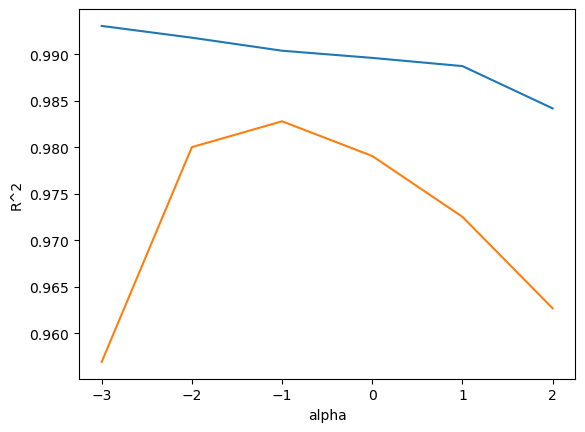

C:\Users\Administrator\miniconda3\envs\tiger-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Administrator\miniconda3\envs\tiger-env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


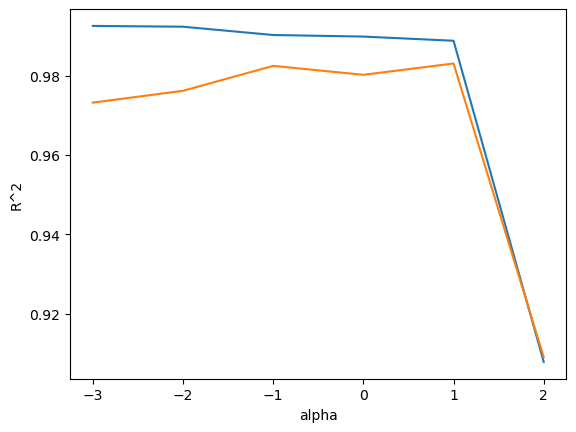

,alpha,10
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

ridge = Ridge()
ridge.fit(train_scaled, train_target)

train_score = []
test_score = []


alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

lasso = Lasso()
lasso.fit(train_scaled, train_target)

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

## 04-1 로지스틱 회귀

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [35]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax

lr = LogisticRegression()
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

decision = lr.decision_function(test_scaled[:])

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.319 0.014 0.639 0.001 0.018]
 [0.    0.002 0.803 0.002 0.181 0.    0.011]
 [0.    0.    0.022 0.978 0.    0.    0.   ]
 [0.984 0.003 0.    0.    0.001 0.    0.013]
 [0.047 0.    0.817 0.008 0.002 0.    0.126]
 [0.992 0.005 0.    0.    0.    0.    0.003]
 [0.007 0.907 0.002 0.    0.076 0.    0.009]
 [0.999 0.001 0.    0.    0.    0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]
 [0.001 0.    0.936 0.    0.    0.    0.063]
 [0.001 0.003 0.784 0.009 0.19  0.    0.014]
 [0.001 0.035 0.675 0.004 0.263 0.001 0.021]
 [0.991 0.005 0.    0.    0.    0.    0.003]
 [0.    0.002 0.049 0.    0.008 0.941 0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.   ]
 [0.984 0.

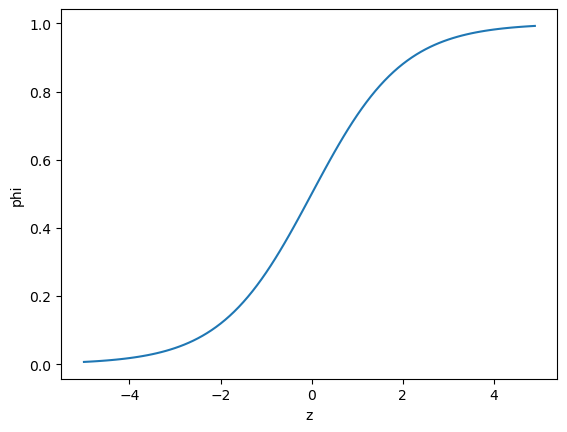

In [36]:
# sigmoid 함수
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 최소 제곱근 구하기

In [24]:
import numpy as np
# y = a * x + b
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])
print(x, y)
mx = np.mean(x)
my = np.mean(y)
print(mx, my)
# (2 - 5.0)**2 +
# (4 - 5.0)**2 +
# (6 - 5.0)**2 +
# (8 - 5.0)**2 +
divisor = sum([(i - mx)**2 for i in x])
# sum([1, 2, 3])
print(divisor)
#------------------------------------------
r = zip(x, y)
dividend = sum([(x-mx)*(y-my) for x, y in r])
# for x, y in r:
#    print(x, y)
a = dividend / divisor
print('기울기 a는', a)

y = my - (mx*a)
print('절편 b는', y)

[2 4 6 8] [81 93 91 97]
5.0 90.5
20.0
기울기 a는 2.3
절편 b는 79.0
